In [1]:
from preprocess import load_model
import torch
import numpy as np

In [2]:
corpus, dictionary, tfidf, lsi, mSimilar = load_model("./preprocess/model_topk/")

2021-04-12 21:07:42,535 : INFO : loaded corpus index from ./preprocess/model_topk/corpus.mm.index
2021-04-12 21:07:42,543 : INFO : initializing cython corpus reader from ./preprocess/model_topk/corpus.mm
2021-04-12 21:07:42,547 : INFO : accepted corpus with 120 documents, 3359 features, 8495 non-zero entries
2021-04-12 21:07:42,555 : INFO : loading Dictionary object from ./preprocess/model_topk/model.dic
2021-04-12 21:07:42,564 : INFO : Dictionary lifecycle event {'fname': './preprocess/model_topk/model.dic', 'datetime': '2021-04-12T21:07:42.563460', 'gensim': '4.0.1', 'python': '3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2021-04-12 21:07:42,567 : INFO : loading TfidfModel object from ./preprocess/model_topk/model.tfidf
2021-04-12 21:07:42,572 : INFO : TfidfModel lifecycle event {'fname': './preprocess/model_topk/model.tfidf', 'datetime': '2021-04-12T21:07:42.572463', 'gensim': '4.0.1', 'p

In [3]:
X = tfidf[corpus]

In [4]:
vec_tfidf=[]

In [5]:
for i in X:
    tmp_vec=[0]*len(dictionary)
    if len(i)!=0:
        for j in i:
            tmp_vec[j[0]]=j[1]
    vec_tfidf.append(tmp_vec)

In [6]:
X=np.array(vec_tfidf)

In [16]:
from sklearn.decomposition import PCA

In [23]:
vec_tfidf=np.array(vec_tfidf)
pca = PCA(n_components=20)
pca = pca.fit(vec_tfidf)
X = pca.transform(vec_tfidf)

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [10]:
from file_utils import get_files

f_list = get_files("./corpus/train_6/")
l = np.array([int(i.split("/")[-1].split("-")[0][1:]) for i in f_list])

KMeans结果

In [ ]:
from training_utils import best_map
from kmeans.numpy_kmeans import KMeans

max_acc = 0
max_i = -1

#14
for i in range(1000):
    kmeans = KMeans(20, random_state=i, device=device)
    label, _ = kmeans.fit_predict(X)
    acc, _ = best_map(l, label.numpy())
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.41:
        print(i, acc)
print("max", max_i, max_acc)

In [11]:
# kmeans
from kmeans.numpy_kmeans import KMeans
from training_utils import best_map
from training_utils import scores

kmeans = KMeans(20, random_state=669, device=device)
label, _ = kmeans.fit_predict(X)
acc, label_pred = best_map(l, label.numpy())
print("准确率:", acc)
scores(l, label_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'float'

In [ ]:
from training_utils import draw

draw(X, label)

KMeans++结果

In [19]:
# kmeans++
from sklearn.cluster import KMeans
from training_utils import best_map

max_acc = 0
max_i = -1

for i in range(1000,2000):
    kmeans = KMeans(6, random_state=i)
    label = kmeans.fit_predict(X)
    acc, _ = best_map(l, label)
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.6:
        print(i, acc)
print("max", max_i, max_acc)

1070 0.6166666666666667
1896 0.625
1917 0.6416666666666667
max 1917 0.6416666666666667


In [16]:
from sklearn.cluster import KMeans
from training_utils import best_map
from training_utils import scores

kmeans = KMeans(6, random_state=120,max_iter=500)
label = kmeans.fit_predict(X)
acc, label_pred = best_map(l, label)
print("准确率:", acc)
scores(l, label_pred)

[5 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 0 2 4 2 2 2 0 2 2 0 2 2 0 2 2 1 2 2
 2 0 2 2 2 1 5 5 1 5 0 5 5 0 2 1 1 4 5 4 5 4 2 1 2 1 1 1 1 1 4 4 1 2 1 3 4
 4 4 4 4 1 1 0 5 4 1 0 1 1 1 1 0 4 4 5 4 3 4 0 4 1 4 5 5 1 1 1 0 0 1 0 0 0
 3 2 0 1 0 1 1 4 1]
准确率: 0.5083333333333333
互信息：0.5705449895571315
调整互信息：0.2742202432997683
标准化互信息：0.3216323351610385
兰德系数： 0.2208324292588291


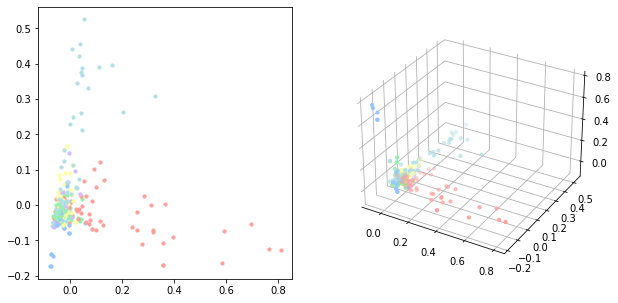

In [14]:
from training_utils import draw

draw(X, label)

MiniBatchKmeans结果

In [ ]:
# minibatchKmeans
from sklearn.cluster import MiniBatchKMeans
from training_utils import best_map

max_acc = 0
max_i = -1
for i in range(2000):
    kmeans = MiniBatchKMeans(20, random_state=i, batch_size=100)
    label = kmeans.fit_predict(X)
    acc, _ = best_map(l, label)
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.44:
        print(i, acc)
print("max", max_i, max_acc)

In [10]:
from sklearn.cluster import MiniBatchKMeans
from training_utils import best_map
from training_utils import scores

kmeans = MiniBatchKMeans(20, random_state=285, batch_size=100)
label = kmeans.fit_predict(X)
acc, label_pred = best_map(l, label)
print("准确率:", acc)
scores(l, label_pred)

准确率: 0.2175
互信息：0.6928714615421558
调整互信息：0.16181575703177525
标准化互信息：0.2980993903811825
兰德系数： 0.015444015444015444


In [ ]:
from training_utils import draw

draw(X, label)